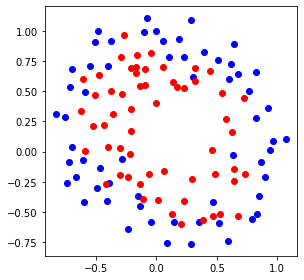

In [31]:
import numpy as np
import matplotlib.pyplot as plt

data    = np.genfromtxt("/content/drive/My Drive/AssignmentFolder/Assignment07/data-nonlinear.txt", delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]

plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

#Logistic regularization : $J(\theta) = {1\over2m}||h(x_i) - y_i||  + {1\over\lambda}\Sigma_{j = 1}^k \theta_k^2$
set lamba to make overfitting, underfitting, just right


In [51]:
degree = 10
#X_poly : (x^2 * y) 와 같이, 모든 차수들이 포함되어있는 matrix
#첫째항이 np.ones인 이유는 theta0값을 그대로 출력하기 위해
X_poly = np.ones(len(pointX))
for i in range(0, degree):  
  for j in range(0, degree):
      #0,0인경우는 제외
      if i != 0 or j != 0:
        #dot을 이용하기 위해 column_stack을 이용한다.
        X_poly = np.column_stack([X_poly, (pointX ** i) * (pointY ** j)])

#X_poly의 차수만큼 theta들 생성
Theta = np.zeros(X_poly.shape[1]).reshape(X_poly.shape[1], 1)
print(Theta.shape)
#위처럼 생성할 경우 matrix 형식으로생성됨
#squeeze로 list화 시킨다. dot곱을 위함.
T = np.squeeze(Theta, 1)

#sigmoid
z = X_poly.dot(T)
sigz = 1 / (1 + np.exp(-z))

#label transpose & 후에 matrix곱을 위한 matrix화
#np.transpose를 쓰면 error, np.T를 사용한다.
l = np.mat(label).T

#error
E_list = []
E = 0

#accuraty
accuracy = 0
accuracy_list = []

#기타 상수항
alpha = 0.001
#lambda
lmbd1 = 0.1
Threshold = 0.00000005

iter = 0
while 1:      
  #sigmoid
  T = np.squeeze(Theta, 1)
  z = X_poly.dot(T)
  sigz = 1 / (1 + np.exp(-z))
  #accuracy         
  acc = (sigz > 0.5)
  accuracy = (acc == label)
  accuracy_list.append((np.sum(accuracy) / len(label)) * 100)
  #Error
  tmp = E   
  E = (np.sum(-label * np.log(sigz) - (1-label) * np.log(1-sigz)) / len(label)) + lmbd1 * np.sum(np.power(Theta, 2)) / 2
  E_list.append(E)
  #gradient
  sigz = np.mat(sigz).T
  Theta -= alpha * np.dot(X_poly.T, (sigz - l)) / len(label)
  iter += 1
  if abs(tmp - E) < Threshold:     
      break 
print(iter)

(100, 1)
8313


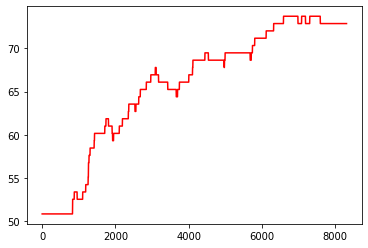

In [52]:
plt.figure() 
plt.plot(accuracy_list, c='r') 
plt.show() 

In [53]:
print(accuracy_list[len(accuracy_list) - 1], "%")

72.88135593220339 %


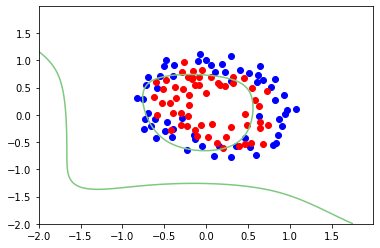

In [57]:
x_graph = np.arange(-2, 2, 0.01)  
y_graph = np.arange(-2, 2, 0.01)    
X, Y = np.meshgrid(x_graph, y_graph) 
#meshgrid된 2차원 X, Y를 1차원으로 핀다
X = np.ravel(X)
Y = np.ravel(Y)  
#XY를 위의 X_poly처럼 합쳐준다
XY = np.ones(len(X))
for i in range(0, degree):  
  for j in range(0, degree):
      #0,0인경우는 제외
      if i != 0 or j != 0:
        XY = np.column_stack((XY, (X ** i) * (Y ** j)))
#z = theta * X
Z = XY.dot(Theta)

#다시 matrix로 되돌린다
X = X.reshape((len(x_graph), len(y_graph)))
Y = Y.reshape((len(x_graph), len(y_graph)))
Z = Z.reshape((len(x_graph), len(y_graph)))
line = plt.contour(X,Y,Z,levels=[0],cmap= "Accent")

plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.show()